In [1]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2L

Python(77915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [2]:
data = pd.read_csv("FINAL_DATA_COMPLETE.csv")

In [3]:
data

,id_image,label,image_name,key_value,ingredients,json_format,json_format_clean,total_g,target,json_nutrition,ing_not_found
0,apple_pie/20_homemade_apple_pie_hostedLargeUrl...,69,20_homemade_apple_pie_hostedLargeUrl.jpg,apple_pie,"flour,salt,oil,cold water,apple,sugar,cinnamon...","{""apple_pie"": {""flour"": 180, ""salt"": 1, ""oil"":...","{'apple_pie': {'flour': 180, 'salt': 1, 'oil':...",1486.6,"[0.14441678999058255, 0.25703820799138977, 0.0...","{'apple_pie': {'cal': 3464.87, 'fat': 0.144416...","['cold water', 'cinnamon']"
1,apple_pie/43_homestyle_apple_pie_hostedLargeUr...,91,43_homestyle_apple_pie_hostedLargeUrl.jpg,apple_pie,"shell,pie,sugar,flour,cinnamon,apple,lemon,but...","{""apple_pie"": {""shell"": 1, ""pie"": 1, ""sugar"": ...","{'apple_pie': {'shell': 1, 'pie': 1, 'sugar': ...",1382.6,"[0.07181759004773615, 0.28602849703457256, 0.0...","{'apple_pie': {'cal': 2527.94, 'fat': 0.071817...","['shell', 'pie', 'cinnamon']"
2,apple_pie/28_apple_pie_hostedLargeUrl.jpg,77,28_apple_pie_hostedLargeUrl.jpg,apple_pie,"apple,lemon,sugar,flour,cinnamon,nut,butter,sa...","{""apple_pie"": {""apple"": 680,""lemon"": 15,""sugar...","{'apple_pie': {'apple': 680, 'lemon': 15, 'sug...",1376.5,"[0.13531783508899384, 0.2786603705049038, 0.01...","{'apple_pie': {'cal': 3215.75, 'fat': 0.135317...","['cinnamon', 'nut', 'ice water']"
3,apple_pie/39_classic_apple_pie_hostedLargeUrl.jpg,88,39_classic_apple_pie_hostedLargeUrl.jpg,apple_pie,"pie,apple,sugar,corn starch,cinnamon,lemon,but...","{""apple_pie"": {""pie"": 1, ""apple"": 680, ""sugar""...","{'apple_pie': {'pie': 1, 'apple': 680, 'sugar'...",1097.6,"[0.08467793367346939, 0.23722029883381926, 0.0...","{'apple_pie': {'cal': 1807.16, 'fat': 0.084677...","['pie', 'cinnamon', 'egg', 'cold water']"
4,apple_pie/13_mug_apple_pie_hostedLargeUrl.jpg,62,13_mug_apple_pie_hostedLargeUrl.jpg,apple_pie,"apple,brown sugar,butter,cinnamon,allspice,nut...","{""apple_pie"": {""apple"": 680, ""brown sugar"": 15...","{'apple_pie': {'apple': 680, 'brown sugar': 15...",947.4,"[0.09804728731264514, 0.25576630778974035, 0.0...","{'apple_pie': {'cal': 1733.81, 'fat': 0.098047...","['cinnamon', 'allspice', 'nut', 'pie']"
...,...,...,...,...,...,...,...,...,...,...,...
3208,chocolate_ice_cream/12_caramelized_white_choco...,4788,12_caramelized_white_chocolate_ice_cream_hoste...,chocolate_ice_cream,"chocolate,milk,sugar,salt,egg","{""chocolate_ice_cream"": {""chocolate"": 100, ""mi...","{'chocolate_ice_cream': {'chocolate': 100, 'mi...",497.0,"[0.07235412474849094, 0.4480885311871227, 0.02...","{'chocolate_ice_cream': {'cal': 1250.5, 'fat':...",['egg']
3209,chocolate_ice_cream/32_chocolate_ice_cream_hos...,4808,32_chocolate_ice_cream_hostedLargeUrl.jpg,chocolate_ice_cream,"chocolate,chocolate,whipping,milk,cheese,sugar...","{""chocolate_ice_cream"": {""chocolate"": 200, ""wh...","{'chocolate_ice_cream': {'chocolate': 200, 'wh...",865.0,"[0.12382658959537572, 0.3622543352601156, 0.06...",{'chocolate_ice_cream': {'cal': 2310.450000000...,"['whipping', 'vanilla']"
3210,chocolate_ice_cream/8_milkiest_chocolate_ice_c...,4784,8_milkiest_chocolate_ice_cream_hostedLargeUrl.jpg,chocolate_ice_cream,"milk,corn starch,chocolate,milk,sugar,corn syr...","{""chocolate_ice_cream"": {""milk"": 480, ""corn st...","{'chocolate_ice_cream': {'milk': 480, 'corn st...",845.0,"[0.054360946745562126, 0.3136568047337278, 0.0...",{'chocolate_ice_cream': {'cal': 1498.780000000...,['corn syrup']
3211,chocolate_ice_cream/7_chocolate_ice_cream_host...,4783,7_chocolate_ice_cream_hostedLargeUrl.jpg,chocolate_ice_cream,"whipping,milk,egg,sugar,cocoa,vanilla,chocolat...","{""chocolate_ice_cream"": {""whipping"": 240,""milk...","{'chocolate_ice_cream': {'whipping': 240, 'mil...",1296.0,"[0.036104938271604936, 0.20003163580246913, 0....","{'chocolate_ice_cream': {'cal': 1433.343, 'fat...","['whipping', 'egg', 'vanilla', 'ice']"


In [4]:
data["id_image"] = data["id_image"].str.strip()

In [5]:
eval(data["target"][0])

[0.14441678999058255,
 0.25703820799138977,
 0.014330687474774654,
 0.584214314543253]

In [6]:
index_to_delete = data[data["target"] == "[nan, nan, nan, nan]"].index

# Delete rows with the specified index
data.drop(index=index_to_delete, inplace=True)

In [7]:
data["target"] = data["target"].apply(lambda x: eval(x))

In [8]:
data["target"]

0       [0.14441678999058255, 0.25703820799138977, 0.0...
1       [0.07181759004773615, 0.28602849703457256, 0.0...
2       [0.13531783508899384, 0.2786603705049038, 0.01...
3       [0.08467793367346939, 0.23722029883381926, 0.0...
4       [0.09804728731264514, 0.25576630778974035, 0.0...
                              ...                        
3208    [0.07235412474849094, 0.4480885311871227, 0.02...
3209    [0.12382658959537572, 0.3622543352601156, 0.06...
3210    [0.054360946745562126, 0.3136568047337278, 0.0...
3211    [0.036104938271604936, 0.20003163580246913, 0....
3212    [0.09020956123117223, 0.1927766863130321, 0.02...
Name: target, Length: 3196, dtype: object

## Train Test Split

### Make sure for each category the train and test split is done equally

In [9]:
"""
X = data["id_image"]  # Features
y = data["target"]  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create DataFrames for training and testing data
train_df = pd.concat(
    [X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1
)
test_df = pd.concat(
    [X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1
)
"""

'\nX = data["id_image"]  # Features\ny = data["target"]  # Target variable\n\n# Split the data into training and testing sets (80% train, 20% test)\nX_train, X_test, y_train, y_test = train_test_split(\n    X, y, test_size=0.2, random_state=42\n)\n\n# Create DataFrames for training and testing data\ntrain_df = pd.concat(\n    [X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1\n)\ntest_df = pd.concat(\n    [X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1\n)\n'

In [10]:
food_subset = data["key_value"].unique().tolist()

In [11]:
# Initialize lists to hold train and test data
train_data = []
test_data = []

# Iterate over each unique category
for category in food_subset:
    # Filter the DataFrame for the current category
    category_data = data[data["key_value"] == category]

    # Split the category data into train and test sets while ensuring equal representation
    train_cat, test_cat = train_test_split(
        category_data, test_size=0.1, random_state=42
    )

    # Add the train and test data to the respective lists
    train_data.append(train_cat)
    test_data.append(test_cat)

# Concatenate the train and test data for each category
train_df = pd.concat(train_data)
test_df = pd.concat(test_data)

In [12]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [13]:
train_df = train_df[["id_image", "target"]]
test_df = test_df[["id_image", "target"]]

In [14]:
# train_df.columns = ['Target_' + str(i) for i in range(1, len(train_df.columns)+1)]
df_split = pd.DataFrame(
    train_df["target"].tolist(), columns=[f"{'target'}_{i+1}" for i in range(4)]
)

# Combine the split columns with the original DataFrame
train_df = pd.concat([train_df.drop(columns=["target"]), df_split], axis=1)

In [15]:
train_df["target_1"]

0       0.029363
1       0.073319
2       0.083826
3       0.058538
4       0.093361
          ...   
2813    0.107091
2814    0.074015
2815    0.054361
2816    0.066471
2817    0.065027
Name: target_1, Length: 2818, dtype: float64

In [16]:
# train_df.columns = ['Target_' + str(i) for i in range(1, len(train_df.columns)+1)]
df_split = pd.DataFrame(
    test_df["target"].tolist(), columns=[f"{'target'}_{i+1}" for i in range(4)]
)

# Combine the split columns with the original DataFrame
test_df = pd.concat([test_df.drop(columns=["target"]), df_split], axis=1)

In [17]:
train_df

,id_image,target_1,target_2,target_3,target_4
0,apple_pie/3_easy_homemade_apple_pie_hostedLarg...,0.029363,0.304375,0.022536,0.643726
1,apple_pie/37_slab_apple_pie_with_easy_crumb_to...,0.073319,0.410543,0.016732,0.499406
2,apple_pie/25_mom's_apple_pie_hostedLargeUrl.jpg,0.083826,0.338273,0.018860,0.559041
3,apple_pie/32_apple_mummy_pie!_hostedLargeUrl.jpg,0.058538,0.234442,0.013268,0.693752
4,apple_pie/14_crustless_apple_pie_hostedLargeUr...,0.093361,0.207675,0.002833,0.696131
...,...,...,...,...,...
2813,chocolate_ice_cream/22_chocolate_ice_cream_hos...,0.107091,0.450556,0.028935,0.413418
2814,chocolate_ice_cream/16_chocolate_ice_cream_hos...,0.074015,0.426231,0.025762,0.473993
2815,chocolate_ice_cream/8_milkiest_chocolate_ice_c...,0.054361,0.313657,0.035160,0.596822
2816,chocolate_ice_cream/1_chocolate_ice_cream_host...,0.066471,0.255987,0.018897,0.658645


In [18]:
K.clear_session()

In [19]:
bestmodel_path = "bestmodel_Calories.keras"
history_path = "history_Calories.log"

In [20]:
training_data = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
)

In [21]:
testing_data = ImageDataGenerator(preprocessing_function=preprocess_input)

In [22]:
training_data_generator = training_data.flow_from_dataframe(
    dataframe=train_df,
    directory="/Users/udyansachdev/Downloads/Recipes5k/images",
    x_col="id_image",
    y_col=["target_1", "target_2", "target_3", "target_4"],
    target_size=(300, 300),
    batch_size=8,
    class_mode="raw",
)

Found 2818 validated image filenames.


In [23]:
validation_data_generator = testing_data.flow_from_dataframe(
    dataframe=test_df,
    directory="/Users/udyansachdev/Downloads/Recipes5k/images",
    x_col="id_image",
    y_col=["target_1", "target_2", "target_3", "target_4"],
    target_size=(300, 300),
    batch_size=8,
    class_mode="raw",
)

Found 378 validated image filenames.


In [24]:
inception = InceptionV3(weights="imagenet", include_top=False)
fc = inception.output
fc = GlobalAveragePooling2D()(fc)
fc = Dense(128, activation="relu")(fc)
fc = Dropout(0.2)(fc)

predictions = Dense(4, kernel_regularizer=regularizers.l2(0.005), activation="softmax")(
    fc
)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(
    optimizer=SGD(learning_rate=0.0001, momentum=0.9),
    # loss="categorical_crossentropy",
    loss="mean_squared_error",
    metrics=["mse"],
)

In [25]:
checkpoint = ModelCheckpoint(filepath=bestmodel_path, verbose=1, save_best_only=True)
csv_logger = CSVLogger(history_path)

In [26]:
history = model.fit(
    training_data_generator,
    steps_per_epoch=training_data_generator.n // 8,
    validation_data=validation_data_generator,
    validation_steps=validation_data_generator.n // 8,
    epochs=20,
    verbose=1,
    callbacks=[csv_logger, checkpoint],
)

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.1016 - mse: 0.0651
Epoch 1: val_loss improved from inf to 0.05755, saving model to bestmodel_Calories.keras
352/352 ━━━━━━━━━━━━━━━━━━━━ 1021s 3s/step - loss: 0.1015 - mse: 0.0650 - val_loss: 0.0575 - val_mse: 0.0212
Epoch 2/20
  1/352 ━━━━━━━━━━━━━━━━━━━━ 30:01 5s/step - loss: 0.0582 - mse: 0.0219

2024-04-13 20:36:22.295721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-04-13 20:36:23.295134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 2: val_loss improved from 0.05755 to 0.02377, saving model to bestmodel_Calories.keras
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - loss: 0.0292 - mse: 0.0219 - val_loss: 0.0238 - val_mse: 0.0112
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.0580 - mse: 0.0217
Epoch 3: val_loss did not improve from 0.02377
352/352 ━━━━━━━━━━━━━━━━━━━━ 920s 3s/step - loss: 0.0580 - mse: 0.0217 - val_loss: 0.0556 - val_mse: 0.0195
Epoch 4/20
  1/352 ━━━━━━━━━━━━━━━━━━━━ 14:11 2s/step - loss: 0.0603 - mse: 0.0241

2024-04-13 20:51:53.504209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-13 20:51:54.022792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: val_loss improved from 0.02377 to 0.02003, saving model to bestmodel_Calories.keras
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0302 - mse: 0.0241 - val_loss: 0.0200 - val_mse: 0.0039
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.0581 - mse: 0.0220
Epoch 5: val_loss did not improve from 0.02003
352/352 ━━━━━━━━━━━━━━━━━━━━ 922s 3s/step - loss: 0.0581 - mse: 0.0220 - val_loss: 0.0549 - val_mse: 0.0191
Epoch 6/20
  1/352 ━━━━━━━━━━━━━━━━━━━━ 16:33 3s/step - loss: 0.0774 - mse: 0.0415

2024-04-13 21:07:21.898091: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-13 21:07:22.260216: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 6: val_loss improved from 0.02003 to 0.01989, saving model to bestmodel_Calories.keras
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - loss: 0.0388 - mse: 0.0415 - val_loss: 0.0199 - val_mse: 0.0039
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.0575 - mse: 0.0216
Epoch 7: val_loss did not improve from 0.01989
352/352 ━━━━━━━━━━━━━━━━━━━━ 1034s 3s/step - loss: 0.0575 - mse: 0.0216 - val_loss: 0.0538 - val_mse: 0.0183
Epoch 8/20
  1/352 ━━━━━━━━━━━━━━━━━━━━ 19:00 3s/step - loss: 0.0762 - mse: 0.0406

2024-04-13 21:24:49.793236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-13 21:24:50.307659: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 8: val_loss did not improve from 0.01989
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0382 - mse: 0.0406 - val_loss: 0.0556 - val_mse: 0.0756
Epoch 9/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.0550 - mse: 0.0195
Epoch 9: val_loss did not improve from 0.01989
352/352 ━━━━━━━━━━━━━━━━━━━━ 965s 3s/step - loss: 0.0550 - mse: 0.0195 - val_loss: 0.0536 - val_mse: 0.0183
Epoch 10/20
  1/352 ━━━━━━━━━━━━━━━━━━━━ 16:03 3s/step - loss: 0.0705 - mse: 0.0351

2024-04-13 21:40:58.428195: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-13 21:40:58.742336: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 10: val_loss did not improve from 0.01989
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0353 - mse: 0.0351 - val_loss: 0.0217 - val_mse: 0.0081
Epoch 11/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.0552 - mse: 0.0199
Epoch 11: val_loss did not improve from 0.01989
352/352 ━━━━━━━━━━━━━━━━━━━━ 941s 3s/step - loss: 0.0552 - mse: 0.0199 - val_loss: 0.0532 - val_mse: 0.0182
Epoch 12/20
  1/352 ━━━━━━━━━━━━━━━━━━━━ 15:50 3s/step - loss: 0.0496 - mse: 0.0145

2024-04-13 21:56:42.609218: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-13 21:56:43.041753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 12: val_loss did not improve from 0.01989
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0249 - mse: 0.0145 - val_loss: 0.0238 - val_mse: 0.0126
Epoch 13/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.0546 - mse: 0.0196
Epoch 13: val_loss did not improve from 0.01989
352/352 ━━━━━━━━━━━━━━━━━━━━ 932s 3s/step - loss: 0.0546 - mse: 0.0196 - val_loss: 0.0527 - val_mse: 0.0179
Epoch 14/20
  1/352 ━━━━━━━━━━━━━━━━━━━━ 14:29 2s/step - loss: 0.0652 - mse: 0.0304

2024-04-13 22:12:19.297505: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-13 22:12:19.591905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 14: val_loss did not improve from 0.01989
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0327 - mse: 0.0304 - val_loss: 0.0299 - val_mse: 0.0251
Epoch 15/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.0532 - mse: 0.0184
Epoch 15: val_loss did not improve from 0.01989
352/352 ━━━━━━━━━━━━━━━━━━━━ 931s 3s/step - loss: 0.0532 - mse: 0.0184 - val_loss: 0.0523 - val_mse: 0.0177
Epoch 16/20
  1/352 ━━━━━━━━━━━━━━━━━━━━ 14:58 3s/step - loss: 0.0419 - mse: 0.0074

2024-04-13 22:27:53.978585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 16: val_loss did not improve from 0.01989
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0210 - mse: 0.0074 - val_loss: 0.0216 - val_mse: 0.0086
Epoch 17/20


2024-04-13 22:27:54.367610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 0.0536 - mse: 0.0191
Epoch 17: val_loss did not improve from 0.01989
352/352 ━━━━━━━━━━━━━━━━━━━━ 918s 3s/step - loss: 0.0536 - mse: 0.0191 - val_loss: 0.0518 - val_mse: 0.0176
Epoch 18/20
  1/352 ━━━━━━━━━━━━━━━━━━━━ 15:35 3s/step - loss: 0.0525 - mse: 0.0182

2024-04-13 22:43:15.569221: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-13 22:43:15.954249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 18: val_loss did not improve from 0.01989
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0263 - mse: 0.0182 - val_loss: 0.0250 - val_mse: 0.0158
Epoch 19/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0528 - mse: 0.0185
Epoch 19: val_loss did not improve from 0.01989
352/352 ━━━━━━━━━━━━━━━━━━━━ 890s 3s/step - loss: 0.0528 - mse: 0.0185 - val_loss: 0.0516 - val_mse: 0.0176
Epoch 20/20
  1/352 ━━━━━━━━━━━━━━━━━━━━ 14:59 3s/step - loss: 0.0413 - mse: 0.0072

2024-04-13 22:58:08.759822: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-13 22:58:09.008526: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 20: val_loss did not improve from 0.01989
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0207 - mse: 0.0072 - val_loss: 0.0205 - val_mse: 0.0070


In [34]:
model.save("trainedmodel_Calories.keras")

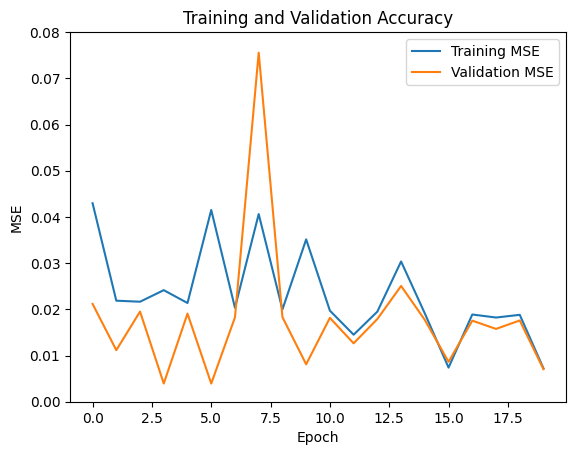

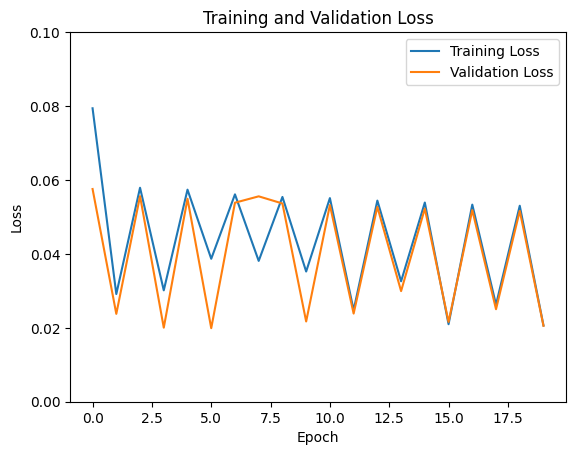

In [40]:
import matplotlib.pyplot as plt


def plot_training_history(history, title, ylim=None):
    plt.title(title)
    plt.plot(history.history["mse"], label="Training MSE")
    plt.plot(history.history["val_mse"], label="Validation MSE")
    plt.ylabel("MSE")
    plt.xlabel("Epoch")
    if ylim:
        plt.ylim(ylim)
    plt.legend(loc="best")
    plt.show()


def plot_loss_history(history, title, ylim=None):
    plt.title(title)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    if ylim:
        plt.ylim(ylim)
    plt.legend(loc="best")
    plt.show()


# Example usage:
# Set custom y-axis range for MSE and Loss plots
ylim_mse = (0, 0.08)  # Example range for MSE plot
ylim_loss = (0, 0.1)  # Example range for Loss plot

plot_training_history(history, "Training and Validation Accuracy", ylim=ylim_mse)
plot_loss_history(history, "Training and Validation Loss", ylim=ylim_loss)

In [29]:
model_best = load_model("trainedmodel_Calories.keras", compile=False)

## Prediction

In [30]:
img = "/Users/udyansachdev/Downloads/ML_Final/test_images/2.jpeg"
# apple_pie/36_vermont_apple_slab_pie_hostedLargeUrl.jpg
# apple_pie/31_skinny_apple_pie_hostedLargeUrl.jpg
# apple_pie/2_perfect_apple_pie_hostedLargeUrl.jpg

In [31]:
img = image.load_img(img, target_size=(300, 300))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

In [32]:
pred = model_best.predict(img)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [33]:
pred

array([0.11072452, 0.20565021, 0.12573901, 0.5578863 ], dtype=float32)